### 《周處除三害》在社群媒體影響力與輿情分析
* 課程：社群媒體分析
* 授課教授：黃三益老師
* 組別：Group_7
* 組員：B094020019 陳羽楨、B104020035 陳達豐、B104020041 張世諭、B084011022 王煜凱、M124020025 吳安倢、M124020034 游凱翔、M124020041 洪維彤、M124020051 李柏翰

## 大綱
1. 資料介紹
  * 1.1 資料來源
  * 1.2 分析動機&目的
2. 資料前處理
  * 2.1 資料匯入
  * 2.2 資料清理
  * 2.3 斷詞及停用字處理
  * 2.4 計算詞頻
  * 2.5 文字雲

### 1. 資料介紹

* 資料來源
    * 文字平台收集PPT平台上與《周處除三害》相關的文章
    * 來源：電影版、八卦版
* 關鍵字：周處除三害
* 時間： 2023-10-01 ~ 2024-03-15
* 資料筆數：共 414 篇文章

* 分析動機

1. 社會意識提升：透過研究社群媒體上的對話和討論，提高公眾對當前社會問題（如環境保護、社會正義等）的認識和關注。
2. 情緒與觀點分析：分析社群媒體用戶對於此電影的情緒和觀點，以了解公眾的態度。
3. 趨勢追蹤：追蹤特定社會問題在社群媒體上的討論趨勢，包括話題的熱度變化、關鍵詞的演變等，以評估社會關注度的變化。

* 分析目的 

    影響力評估：分析《周處除三害》在PTT平台上的關注度，包括點讚、分享、評論等互動數據

### 前情提要

台灣電影《周處除三害》由香港導演黃精甫執導、編劇與剪輯！

電影從一開頭一位黑幫老大的告別式上，陳桂林衝出來毫不避諱的除掉其他黑幫尋仇，可以發現他做事的乾脆俐落，也透過一名小弟如何描述「桂林仔」看出陳桂林不僅很滿意江湖上有人注意到他，同時也很在意自己留下的名號，比起別人幫他取的綽號，他更希望留下正名。

「三害不除，何樂之有？」《周處除三害》劇情引用典故，描述通緝犯陳桂林在角頭大哥告別式上囂張尋仇，卻發現自己竟然只是排名第三的通緝犯。他查出前二名通緝犯的下落，要將他們一一除掉，以為自己已成為當代的周處除三害，卻沒想到永遠參不透的貪嗔癡，才是人生終要面對的罪與罰。

### 2. 資料前處理

### 2.1 資料匯入

In [1]:
from datetime import datetime
from collections import Counter
from PIL import Image, ImageSequence

import pandas as pd
import jieba
import jieba.analyse
import matplotlib.font_manager as fm

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('raw_data/moive_1.csv')
print(f"PTT 共有 {df.shape[0]} 篇文章") 

#將artDate欄位只留下 年/月/日
df['artDate'] = pd.to_datetime(df['artDate']).dt.date
df.head()

PTT 共有 430 篇文章


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,kevin19528,Gossiping,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""mscmobitai"",...",27.53.121.199,2023-10-03 01:31:03,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,takuminauki,Gossiping,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PanaS0Nic"", ...",114.46.58.46,2023-10-04 01:36:57,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,Hsins,Gossiping,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""tearness"", ""...",61.223.222.252,2023-10-06 01:37:57,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,HNCB2880,Gossiping,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""spzper"", ""cm...",223.136.68.101,2023-10-07 01:34:56,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,rainiem3m3,Gossiping,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""a27588679"", ...",49.216.131.16,2023-10-07 01:35:28,ptt


### 2.2 資料清理
- 去除NA值
- 正規化資料清理
- 去除不是中文的字詞

In [3]:
#清理文章內容
clear_df = df.copy()
#去除有包含空值的筆數
clear_df.dropna(axis = 0, how = 'any', inplace = True)

#去除不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate','dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)


#移除內文中的網址
clear_df['sentence'] = (
    clear_df['artContent']
    .replace(r'http\S+', '', regex = True)
    .replace(r'www\S+', '', regex = True)
    .replace(r'\d+', '', regex = True)
    .replace(r'\n\n','。', regex=True)
    .replace(r'\n' ,',', regex=True)
)

clear_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影。開播前照慣例都會放過幾天要上映的預告片。之前加減都會放些...
1,https://www.ptt.cc/bbs/Gossiping/M.1696334149....,[問卦]許光漢有機會成為台灣最帥金馬影帝嗎,2023-10-03,今年金馬獎最佳男主角競爭激烈\n\n台北電影節最佳男主角\n疫起 王柏傑\n\n金馬獎影帝\...,"今年金馬獎最佳男主角競爭激烈。台北電影節最佳男主角,疫起 王柏傑。金馬獎影帝,周處除三害 阮..."
2,https://www.ptt.cc/bbs/Gossiping/M.1696506178....,[問卦]租房子有什麼要注意的嗎？,2023-10-05,如題啦\n最近聽朋友在那邊聊金馬入圍名單\n聊一聊就聽到他們在說租屋的事\n什麼租房子要除三...,"如題啦,最近聽朋友在那邊聊金馬入圍名單,聊一聊就聽到他們在說租屋的事,什麼租房子要除三害之類..."
3,https://www.ptt.cc/bbs/Gossiping/M.1696578310....,[問卦]周處除三害是哪三害？☺,2023-10-06,是這樣的啦\n\n軟今天演出周處除三害\n\n三害是大白虎 大蛟龍\n\n還有一害是什麼？\...,"是這樣的啦。軟今天演出周處除三害。三害是大白虎 大蛟龍。還有一害是什麼？。不是都說周處除三害嗎,"
4,https://www.ptt.cc/bbs/Gossiping/M.1696582263....,[問卦]解放軍代言人可以回台爭影帝？,2023-10-06,今天周處除三害上映 最近也一堆金馬入圍新聞\n\n但有人知道阮經天之前是如何嗎\n\n用台灣...,今天周處除三害上映 最近也一堆金馬入圍新聞。但有人知道阮經天之前是如何嗎。用台灣健保在台灣長...
5,https://www.ptt.cc/bbs/Gossiping/M.1696719803....,[新聞]（新片搶鮮看）《蒼鷺與少年》奇幻旅程,2023-10-08,備註請放最後面 違者新聞文章刪除\n1.媒體來源:自由時報\n\n2.記者署名:許世穎\n\...,"備註請放最後面 違者新聞文章刪除,.媒體來源:自由時報。.記者署名:許世穎。.完整新聞標題:..."
6,https://www.ptt.cc/bbs/Gossiping/M.1696821659....,[問卦]大膽預測周處除三害會破億,2023-10-09,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...,如題，昨天去電影院看周處除三害，說看過的國片裡面第一名的，超好看的，所以我大膽預測會破億，還...
7,https://www.ptt.cc/bbs/Gossiping/M.1697185829....,[問卦]台灣人包容度是不是過高了,2023-10-13,只有我看到這個嗎\nhttps://i.imgur.com/P7BmXGq.jpg\n周處除...,"只有我看到這個嗎。周處除三害上映了,阿老實說 故事線是會想去看一下,畢竟麋先生一直是我的愛團..."
8,https://www.ptt.cc/bbs/Gossiping/M.1697380547....,[新聞]錢人豪點名阮經天《周處》涉抄襲！周一發,2023-10-15,記者江芷稜／綜合報導\n2023-10-15 19:33:04\n｜\n2023-10-15...,"記者江芷稜／綜合報導,-- ::,｜,-- ::,導演錢人豪近日在臉書指控某部上映中電影與他..."
9,https://www.ptt.cc/bbs/Gossiping/M.1697607887....,[新聞]錢人豪正式提告了！公開《周處除三害》,2023-10-18,1.媒體來源:\n三立\n\n2.記者署名:\n2023/10/18 12:07\n娛樂中心...,".媒體來源:,三立。.記者署名:,// :,娛樂中心／徐珮華報導。.完整新聞標題:,錢人豪正..."


* 斷句

中文主要以標點符號進行斷句，並清除空的字串

In [4]:
#清理符號
clear_df['sentence'] = clear_df['sentence'].astype(str).str.split("[,，。！!？?]{1,}")
sent_df = clear_df.explode("sentence").reset_index(drop=True)

#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]
sent_df.head(10)

,artUrl,artTitle,artDate,artContent,sentence
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天去看我們金馬男神阮經天演的電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播前照慣例都會放過幾天要上映的預告片
2,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,之前加減都會放些國外的預告片
3,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,結果昨天播了三部電影預告片全部都是臺灣國產
4,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,周處除三害
5,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,女鬼橋
6,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,動物感傷の清晨
7,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,尤其是動物感傷那部的預告片有夠煽情的啦
8,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,回到重點
9,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,今年是國片元年嗎


### 2.3 斷詞及停用字處理

使用jieba套件進行斷詞與移除停用字

In [5]:
#設定繁體中文詞庫
jieba.set_dictionary("dict/dict.txt")
#新增自定義字典
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /Users/wuanjie/Desktop/NLP/SocialAnalysis_1st/week3/dict/dict.txt ...
Dumping model to file cache /var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/jieba.ub2ff00d7b8efc60e6b30591c4a320b12.cache
Loading model cost 1.755 seconds.
Prefix dict has been built successfully.


In [6]:
#對文章內容進行斷詞處理
word_df = (
    sent_df.assign(word=sent_df["sentence"].apply(jieba.lcut))
    .explode("word")
    .drop(["sentence"], axis=1)
)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,我們
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過


* 計算去除停用字

In [7]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_19939/36027799.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,電影,598
1,周處除三害,497
2,台灣,452
3,最佳,325
4,阮經天,269
5,陳桂林,247
6,票房,247
7,就是,228
8,中國,215
9,自己,204


### 2.4 計算詞頻

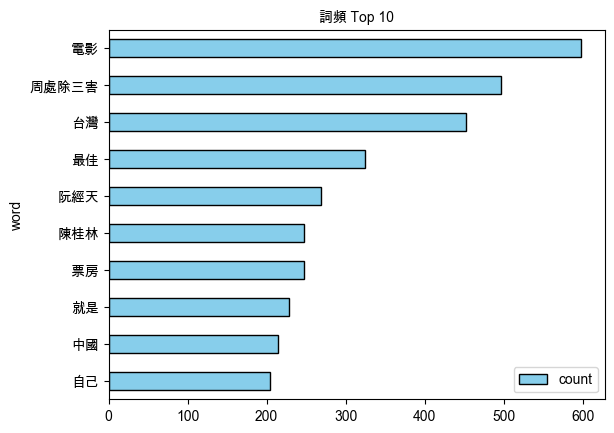

In [8]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']

ax =freq_df.head(10).plot.barh(x = 'word', y = 'count',color='skyblue', edgecolor='black')
ax.invert_yaxis()
plt.title('詞頻 Top 10', fontsize=10)       
plt.show()

In [9]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'電影': 598,
 '周處除三害': 497,
 '台灣': 452,
 '最佳': 325,
 '阮經天': 269,
 '陳桂林': 247,
 '票房': 247,
 '就是': 228,
 '中國': 215,
 '自己': 204,
 '一個': 203,
 '香港': 189,
 '覺得': 188,
 '真的': 187,
 '周處': 183,
 '沒有': 181,
 '導演': 167,
 '最後': 162,
 '主角': 161,
 '故事': 158,
 '不是': 150,
 '可以': 149,
 '上映': 148,
 '入圍': 145,
 '知道': 134,
 '劇情': 129,
 '角色': 128,
 '這個': 124,
 '金馬': 123,
 '看到': 123,
 '還是': 122,
 '這部': 116,
 '因為': 115,
 '大陸': 109,
 '黑道': 109,
 '邪教': 109,
 '大家': 102,
 '國片': 100,
 '什麼': 100,
 '演員': 98,
 '今天': 96,
 '還有': 96,
 '如果': 91,
 '新聞': 90,
 '所以': 89,
 '很多': 87,
 '這樣': 87,
 '觀眾': 85,
 '開始': 84,
 '然後': 82,
 '其實': 81,
 '王淨': 80,
 '只是': 80,
 '應該': 79,
 '現在': 79,
 '感覺': 77,
 '已經': 73,
 '但是': 72,
 '通緝犯': 72,
 '怎麼': 71,
 '尊者': 70,
 '這麼': 69,
 '結果': 69,
 '他們': 69,
 '成為': 68,
 'on': 67,
 'my': 67,
 'from': 67,
 'Sent': 67,
 '台幣': 66,
 '影帝': 66,
 '可能': 66,
 '不過': 66,
 '一下': 66,
 '第一': 65,
 '演技': 65,
 '雖然': 65,
 '完全': 63,
 '醫生': 63,
 '李烈': 62,
 '這種': 61,
 '金馬獎': 61,
 '最近': 61,
 '發現': 60,
 '之後': 59,
 '那個': 59,
 '時候

### 2.5 繪製文字雲

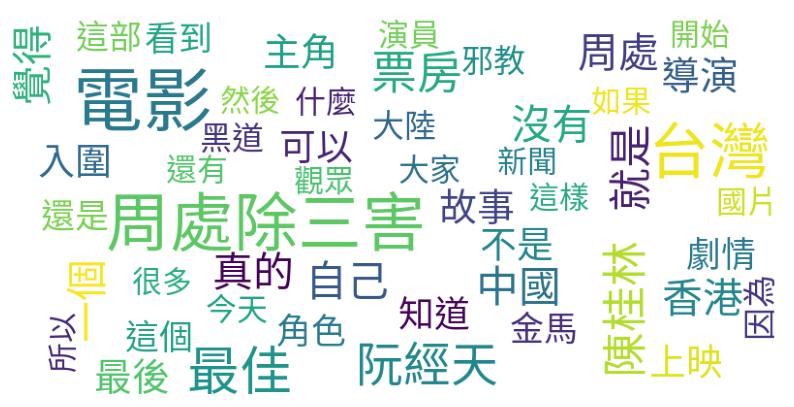

In [10]:
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型

# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

移除停用字


In [12]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

In [13]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artUrl,artTitle,artDate,artContent,word
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,昨天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,金馬
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,男神
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,阮經天
0,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,電影
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,開播
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,前照
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,慣例
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,放過
1,https://www.ptt.cc/bbs/Gossiping/M.1696222497....,[問卦]今年是國片元年嗎？,2023-10-02,昨天去看我們金馬男神阮經天演的電影\n\n開播前照慣例都會放過幾天要上映的預告片\n\n之前...,幾天要


移除停用字後，可以看到「自己」、「就是」等等比較無關緊要的字詞就被移除掉

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_19939/583685406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


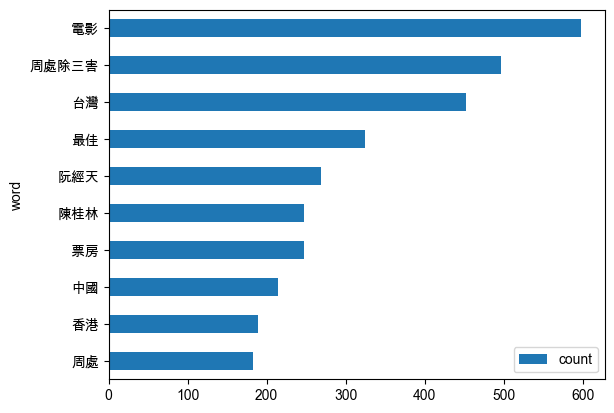

In [14]:
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_nostop.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

重新繪製文字雲

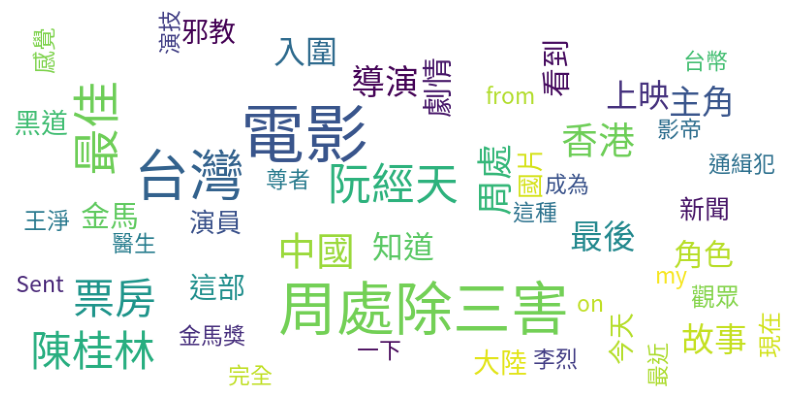

In [15]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = FontPath, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()